In [1]:
import os
os.chdir('/Users/karankale/Downloads/Python for Finance/WORKING DIRECTORY')

# Quality Checks

In [167]:
dataset['Cust Id'].unique()

array([  55,  166,   17, ..., 1621,  511, 1311])

In [168]:
dataset['Months Since Last Buy'].value_counts()

1     284
2     234
9     221
3     201
5     136
6     135
4     131
7     130
8     114
10    113
11     25
12     23
Name: Months Since Last Buy, dtype: int64

In [165]:
dataset['Spend Category'].value_counts()

1) $0 - $100        644
2) $100 - $200      346
3) $200 - $350      335
4) $350 - $500      170
5) $500 - $750      149
6) $750 - $1,000     62
7) $1,000 +          41
Name: Spend Category, dtype: int64

In [8]:
dataset['Spend Numeric'].unique()

array([29.99, 33.46, 35.7 , ..., 46.54, 47.76, 48.04])

In [170]:
dataset['Mens Merchandise'].value_counts()

1    1005
0     742
Name: Mens Merchandise, dtype: int64

In [171]:
dataset['Womens Merchandise'].value_counts()

1    961
0    786
Name: Womens Merchandise, dtype: int64

In [172]:
dataset['Area'].value_counts()

Surburban    790
Urban        691
Rural        266
Name: Area, dtype: int64

In [173]:
dataset['New Customer'].value_counts()

1    887
0    860
Name: New Customer, dtype: int64

In [174]:
dataset['Purchase Channel'].value_counts()

Web             778
Phone           760
Multichannel    209
Name: Purchase Channel, dtype: int64

In [176]:
dataset['Visited Website'].value_counts()

0    1237
1     510
Name: Visited Website, dtype: int64

In [177]:
dataset['Sale Made'].value_counts()

0    1366
1     381
Name: Sale Made, dtype: int64

# Prediction Model

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
dataset=pd.read_csv('Proj 2 - Retail_Case_Study_Data.csv')

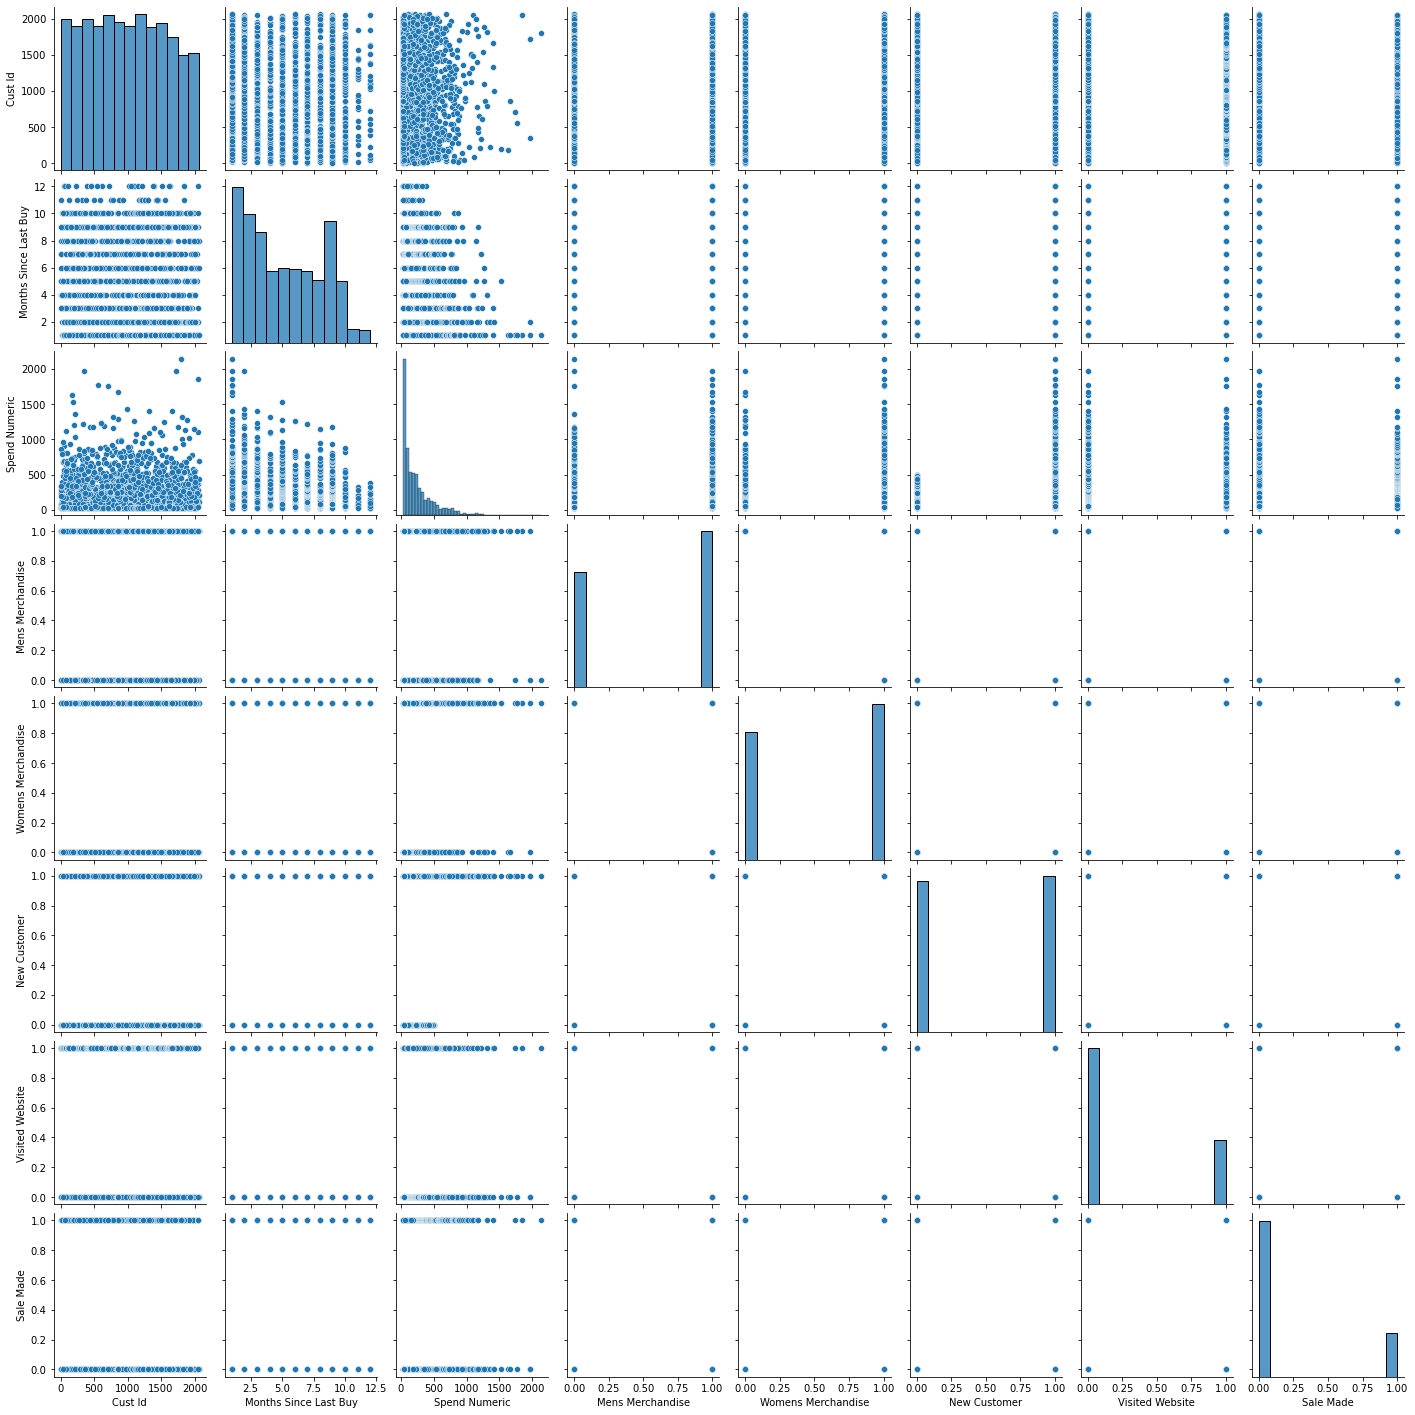

In [156]:
sns.pairplot(dataset)

In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cust Id                1747 non-null   int64  
 1   Months Since Last Buy  1747 non-null   int64  
 2   Spend Category         1747 non-null   object 
 3   Spend Numeric          1747 non-null   float64
 4   Mens Merchandise       1747 non-null   int64  
 5   Womens Merchandise     1747 non-null   int64  
 6   Area                   1747 non-null   object 
 7   New Customer           1747 non-null   int64  
 8   Purchase Channel       1747 non-null   object 
 9   Visited Website        1747 non-null   int64  
 10  Sale Made              1747 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 150.3+ KB


In [237]:
dataset

,Cust Id,Months Since Last Buy,Spend Category,Spend Numeric,Mens Merchandise,Womens Merchandise,Area,New Customer,Purchase Channel,Visited Website,Sale Made
0,55,1,1) $0 - $100,29.99,1,0,Surburban,1,Phone,0,1
1,166,1,1) $0 - $100,29.99,1,0,Surburban,1,Web,0,1
2,17,2,1) $0 - $100,29.99,0,1,Urban,1,Phone,1,1
3,296,1,1) $0 - $100,29.99,1,0,Rural,0,Phone,0,1
4,1013,1,1) $0 - $100,29.99,0,1,Rural,1,Web,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1742,40,10,1) $0 - $100,45.82,1,0,Surburban,1,Phone,0,0
1743,549,10,1) $0 - $100,46.19,0,1,Rural,1,Phone,0,0
1744,1621,10,1) $0 - $100,46.54,1,0,Rural,1,Phone,0,0
1745,511,10,1) $0 - $100,47.76,1,0,Surburban,1,Phone,0,0


In [238]:
x=dataset.iloc[:,1:10].values


In [239]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8
0,1,1) $0 - $100,29.99,1,0,Surburban,1,Phone,0
1,1,1) $0 - $100,29.99,1,0,Surburban,1,Web,0
2,2,1) $0 - $100,29.99,0,1,Urban,1,Phone,1
3,1,1) $0 - $100,29.99,1,0,Rural,0,Phone,0
4,1,1) $0 - $100,29.99,0,1,Rural,1,Web,0
...,...,...,...,...,...,...,...,...,...
1742,10,1) $0 - $100,45.82,1,0,Surburban,1,Phone,0
1743,10,1) $0 - $100,46.19,0,1,Rural,1,Phone,0
1744,10,1) $0 - $100,46.54,1,0,Rural,1,Phone,0
1745,10,1) $0 - $100,47.76,1,0,Surburban,1,Phone,0


In [240]:
y=dataset.iloc[:,10].values

In [241]:
pd.DataFrame(y)

,0
0,1
1,1
2,1
3,1
4,1
...,...
1742,0
1743,0
1744,0
1745,0


In [242]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()
x[:,1]=Labelencoder_x.fit_transform(x[:,1])
x[:,5]=Labelencoder_x.fit_transform(x[:,5])
x[:,7]=Labelencoder_x.fit_transform(x[:,7])

In [243]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8
0,1,0,29.99,1,0,1,1,1,0
1,1,0,29.99,1,0,1,1,2,0
2,2,0,29.99,0,1,2,1,1,1
3,1,0,29.99,1,0,0,0,1,0
4,1,0,29.99,0,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...
1742,10,0,45.82,1,0,1,1,1,0
1743,10,0,46.19,0,1,0,1,1,0
1744,10,0,46.54,1,0,0,1,1,0
1745,10,0,47.76,1,0,1,1,1,0


# ENCODING COLUMNS WITH MULTIPLE VARIABLES

In [244]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [247]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,1,29.99,1,0,1,1,1,0
1,0,0,0,0,0,0,1,29.99,1,0,1,1,2,0
2,0,0,0,0,0,0,2,29.99,0,1,2,1,1,1
3,0,0,0,0,0,0,1,29.99,1,0,0,0,1,0
4,0,0,0,0,0,0,1,29.99,0,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,0,0,0,0,0,0,10,45.82,1,0,1,1,1,0
1743,0,0,0,0,0,0,10,46.19,0,1,0,1,1,0
1744,0,0,0,0,0,0,10,46.54,1,0,0,1,1,0
1745,0,0,0,0,0,0,10,47.76,1,0,1,1,1,0


In [246]:
x=x[:,1:]

In [248]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([('encoder',OneHotEncoder(),[10])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [251]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0,0,0,0,0,0,0,1,29.99,1,0,1,1,0
1,1,0,0,0,0,0,0,0,1,29.99,1,0,1,2,0
2,0,1,0,0,0,0,0,0,2,29.99,0,1,1,1,1
3,0,0,0,0,0,0,0,0,1,29.99,1,0,0,1,0
4,0,0,0,0,0,0,0,0,1,29.99,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1,0,0,0,0,0,0,0,10,45.82,1,0,1,1,0
1743,0,0,0,0,0,0,0,0,10,46.19,0,1,1,1,0
1744,0,0,0,0,0,0,0,0,10,46.54,1,0,1,1,0
1745,1,0,0,0,0,0,0,0,10,47.76,1,0,1,1,0


In [250]:
x=x[:,1:]

In [252]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([('encoder',OneHotEncoder(),[13])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [256]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,1,0,0,0,0,0,0,0,1,29.99,1,0,1,0
1,0,1,1,0,0,0,0,0,0,0,1,29.99,1,0,1,0
2,1,0,0,1,0,0,0,0,0,0,2,29.99,0,1,1,1
3,1,0,0,0,0,0,0,0,0,0,1,29.99,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,29.99,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1,0,1,0,0,0,0,0,0,0,10,45.82,1,0,1,0
1743,1,0,0,0,0,0,0,0,0,0,10,46.19,0,1,1,0
1744,1,0,0,0,0,0,0,0,0,0,10,46.54,1,0,1,0
1745,1,0,1,0,0,0,0,0,0,0,10,47.76,1,0,1,0


In [255]:
x=x[:,1:]

In [257]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [258]:
from sklearn.preprocessing import Normalizer
nm_x=Normalizer()
x=nm_x.fit_transform(x)

In [260]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)


In [262]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor(n_estimators=25)
regressor_rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=25)

In [263]:
y_pred_rf=regressor_rf.predict(x_test)

In [264]:
r2_score(y_test,y_pred_rf)

0.0965858610714726

In [265]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [266]:
y_pred_lg=logmodel.predict(x_test)

In [267]:
accuracy_score(y_test,y_pred_lg)

0.7171428571428572

In [268]:
confusion_matrix(y_test,y_pred_lg)

array([[245,  20],
       [ 79,   6]])

In [269]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=10,metric='euclidean',p=2)
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [270]:
y_pred_knn=classifier_knn.predict(x_test)

In [271]:
accuracy_score(y_test,y_pred_knn)

0.7428571428571429

In [272]:
confusion_matrix(y_test,y_pred_knn)

array([[254,  11],
       [ 79,   6]])

In [273]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [274]:
y_pred_nb=classifier_nb.predict(x_test)

In [275]:
accuracy_score(y_test,y_pred_nb)

0.7342857142857143

In [276]:
confusion_matrix(y_test,y_pred_nb)

array([[233,  32],
       [ 61,  24]])

In [277]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='entropy')
classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [278]:
y_pred_dt=classifier_dt.predict(x_test)

In [279]:
accuracy_score(y_test,y_pred_dt)

0.7514285714285714

In [280]:
confusion_matrix(y_test,y_pred_dt)

array([[229,  36],
       [ 51,  34]])

In [281]:
from sklearn.svm import SVC
classifier_svm_sig = SVC(kernel='sigmoid')
classifier_svm_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [282]:
y_pred_svm=classifier_svm_sig.predict(x_test)

In [283]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

0.7228571428571429

In [284]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[240,  25],
       [ 72,  13]])

In [285]:
from sklearn.svm import SVC
classifier_svm_lin = SVC(kernel='linear')
classifier_svm_lin.fit(x_train,y_train)

SVC(kernel='linear')

In [286]:
y_pred_svm_lin=classifier_svm_lin.predict(x_test)

In [287]:
accuracy_score(y_test,y_pred_svm_lin)

0.7571428571428571

In [288]:
confusion_matrix(y_test,y_pred_svm_lin)

array([[265,   0],
       [ 85,   0]])

In [289]:
from sklearn.svm import SVC
classifier_svm_rbf = SVC(kernel='rbf')
classifier_svm_rbf.fit(x_train,y_train)

SVC()

In [290]:
y_pred_svm_rbf=classifier_svm_rbf.predict(x_test)

In [291]:
accuracy_score(y_test,y_pred_svm_rbf)

0.7657142857142857

In [292]:
confusion_matrix(y_test,y_pred_svm_rbf)

array([[254,  11],
       [ 71,  14]])

In [293]:
from sklearn.svm import SVC
classifier_svm_pol = SVC(kernel='poly')
classifier_svm_pol.fit(x_train,y_train)

SVC(kernel='poly')

In [294]:
y_pred_svm_pol=classifier_svm_pol.predict(x_test)

In [295]:
accuracy_score(y_test,y_pred_svm_pol)

0.7571428571428571

In [296]:
confusion_matrix(y_test,y_pred_svm_pol)

array([[251,  14],
       [ 71,  14]])

In [297]:
from sklearn.ensemble import  RandomForestClassifier
classifier_rf=RandomForestClassifier(criterion='entropy',n_estimators=100)
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [298]:
y_pred_rf=classifier_rf.predict(x_test)

In [299]:
accuracy_score(y_test,y_pred_rf)

0.7628571428571429

In [300]:
confusion_matrix(y_test,y_pred_rf)

array([[238,  27],
       [ 56,  29]])

# Comparing predictions with actual

In [301]:
Predictions=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred_rf),pd.DataFrame(y_pred_lg),pd.DataFrame(y_pred_knn),pd.DataFrame(y_pred_nb),pd.DataFrame(y_pred_dt),pd.DataFrame(y_pred_svm),pd.DataFrame(y_pred_svm_lin),pd.DataFrame(y_pred_svm_rbf),pd.DataFrame(y_pred_svm_pol),pd.DataFrame(y_pred_rfc)],axis=1)

In [302]:
Predictions.to_csv('/Users/karankale/Downloads/Python for Finance/WORKING DIRECTORY/Predictions.csv')

In [303]:
Predictions.to_csv("Predictions.csv",header=['y_test','y_pred_rf','y_pred_lg','y_pred_knn','y_pred_nb','y_pred_dt','y_pred_svm','y_pred_svm_lin','y_pred_svm_rbf','y_pred_svm_pol','y_pred_rfc'])